In [35]:
import System_model.MonteCarlo_funs as mc
from iapws import IAPWS97
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
import Results.ResultToolbox as rt

from GCHPc.gchpp_simple_model import GCHPpType, GCHPp, calculate_ht_mass_flow, calculate_lt_supply, calculate_orc_mass_flow, calculate_t_bo, calculate_t_hto
from GCHPc.demand import ComodityType, Demand
from GCHPc.orc_m01 import BinaryType, ORC
from GCHPc.brine_properties import Brine

import System_model.CHMP_funs as cf

In [27]:
#------------------Parameters for the C4 function (the geothermal GCHPc component)---------------
GCHPc_params={ "ht_heat_curve" : np.array([5,]),
               "ht_heat_t_supply" : 100,
               "ht_heat_t_return" : 70,
               "lt_heat_curve" : np.array([0,]),
               "lt_heat_t_supply"  :60,
               "lt_heat_t_return" : 40,
               "brine_tds" : .1
              }
#---------------
outPow=[]
outHeat=[]
Tin=[]
Tout=[]
for Temp in np.linspace(70,150):
    rand_param={
       "t"        : Temp,                                         # temperature [°C]
       "p"        : IAPWS97(T=(273+Temp), x=1).P*10 , # pressure    [bar]
       "q"        : 100,                                # Flow rate [L/s]
       "s"        : 30                                      # Salinity [g/L]
    }
    ht_heat=Demand(comodity_type=ComodityType.HEAT, curve=GCHPc_params["ht_heat_curve"], t_supply=GCHPc_params["ht_heat_t_supply"], t_return=GCHPc_params["ht_heat_t_return"])    
    lt_heat=Demand(comodity_type=ComodityType.HEAT, curve=GCHPc_params["lt_heat_curve"], t_supply=GCHPc_params["lt_heat_t_supply"], t_return=GCHPc_params["lt_heat_t_return"])
    orc = ORC(name='orc', t_bi=rand_param['t'], type=BinaryType.ocr_acc)
    brine = Brine(name='test', tds=GCHPc_params['brine_tds'], temperature=rand_param['t'], pressure=rand_param['p'])

    p1,W,H,_=cf.C4(p=rand_param, ht_demand=ht_heat, lt_demand=lt_heat, brine=brine, orc=orc)
    outPow.append(W)
    outHeat.append(H)
    Tin.append(Temp)
    Tout.append(p1['t'])

In [13]:
Thi=110
n=(-0.0005182 * Thi ** 2 + 0.2307 * Thi - 10.71)
t_bi=Thi
t_bo=0.0317 * t_bi + 60.9
4200*(t_bi-t_bo)*n/100/1e6*100

1.6086097697880002

In [7]:
4200 * 100  *(110-70)*0.085

1428000.0

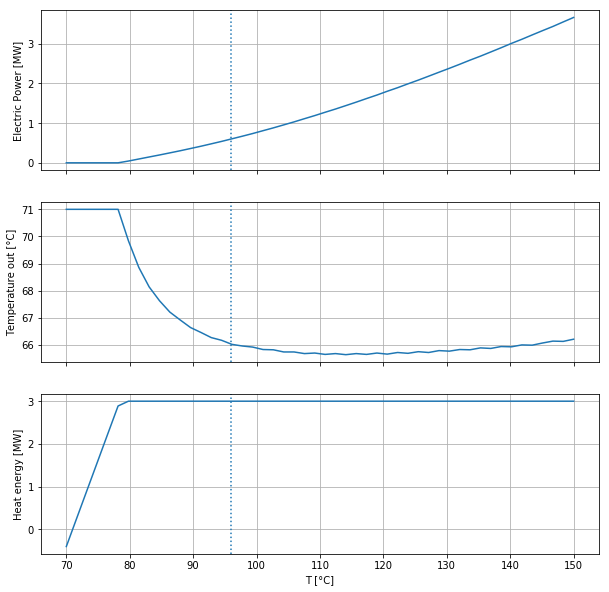

In [21]:
fig,ax=plt.subplots(3,sharex=True,figsize=(10,10))
ax[0].plot(np.linspace(70,150),np.array(outPow))
ax[0].set_ylabel('Electric Power [MW]')
ax[0].grid()
ax[0].axvline(96,ls=':')

ax[1].plot(Tin,Tout)
ax[1].set_ylabel('Temperature out [°C]')
ax[1].grid()
ax[1].axvline(96,ls=':')

ax[2].plot(np.linspace(70,150),outHeat)
ax[2].set_xlabel('T [°C]')
ax[2].set_ylabel('Heat energy [MW]')
ax[2].axvline(96,ls=':')
ax[2].grid()
plt.savefig("Geothermal_powerplant_energy_vs_temperature.png")

In [34]:
#------------------Parameters for the C4 function (the geothermal GCHPc component)---------------
GCHPc_params={ "ht_heat_curve" : np.array([5,]),
               "ht_heat_t_supply" : 100,
               "ht_heat_t_return" : 70,
               "lt_heat_curve" : np.array([0,]),
               "lt_heat_t_supply"  :60,
               "lt_heat_t_return" : 40,
               "brine_tds" : .1
              }
#---------------
outPow=[]
outHeat=[]
T=[]
Trand=np.random.triangular(70,120,150,size=10000)


for Temp in Trand:
    rand_param={
       "t"        : Temp,                                         # temperature [°C]
       "p"        : IAPWS97(T=(273+Temp), x=1).P*10 , # pressure    [bar]
       "q"        : 100,                                # Flow rate [L/s]
       "s"        : 30                                      # Salinity [g/L]
    }
    ht_heat=Demand(comodity_type=ComodityType.HEAT, curve=GCHPc_params["ht_heat_curve"], t_supply=GCHPc_params["ht_heat_t_supply"], t_return=GCHPc_params["ht_heat_t_return"])    
    lt_heat=Demand(comodity_type=ComodityType.HEAT, curve=GCHPc_params["lt_heat_curve"], t_supply=GCHPc_params["lt_heat_t_supply"], t_return=GCHPc_params["lt_heat_t_return"])
    orc = ORC(name='orc', t_bi=rand_param['t'], type=BinaryType.ocr_acc)
    brine = Brine(name='test', tds=GCHPc_params['brine_tds'], temperature=rand_param['t'], pressure=rand_param['p'])

    p1,W,H,_=cf.C4(p=rand_param, ht_demand=ht_heat, lt_demand=lt_heat, brine=brine, orc=orc)
    outPow.append(W)
    outHeat.append(H)
    T.append(Temp);

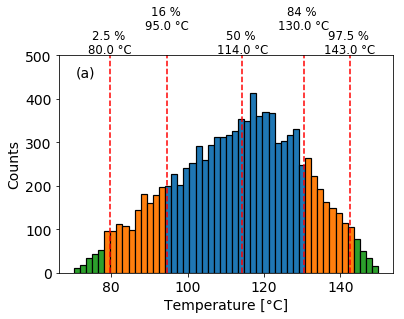

In [42]:
dS=pd.Series(T)
fig, ax=plt.subplots(figsize=(6,4))
rt.plot_histogram(dS,ax,"Temperature [°C]",ymax=500)
ax.text(0.05,0.9,"(a)",transform=ax.transAxes)
plt.savefig("Example_temp.png",dpi=300,bbox_inches='tight')

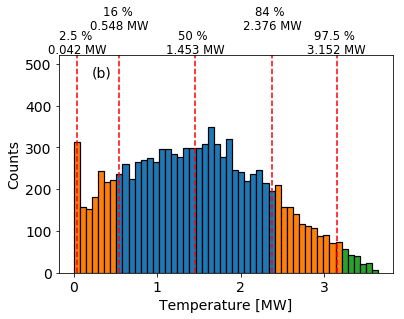

In [45]:
dS=pd.Series(outPow)
fig, ax=plt.subplots(figsize=(6,4))
rt.plot_histogram(dS,ax,"Temperature [MW]",ymax=520)
ax.text(0.1,0.9,"(b)",transform=ax.transAxes)
plt.savefig("Example_Geotherm_power.png",dpi=300,bbox_inches='tight')